<a href="https://colab.research.google.com/github/uofldmlab/IntroDMLab/blob/main/demo_lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Python Libraries

Importing Python libraries extend data-type and function capabilites that are outside the core Python language. The Pandas library is a Python library that is is widely used to open, view, manipulate, and analyze data. The Sklearn library is used to load the functions for spliting the dataframe, the linear regression model, and the functions to evaluate model performance.

Click the Google Colab image at the top of the page to launch the lab in Google Colab: screenshot-2021-09-08-9-15-39- (1).png 

The following link provides a brief tutorial on how to use Google Colab: https://www.youtube.com/watch?v=inN8seMm7UI&ab_channel=TensorFlow

In [52]:
import pandas as pd #pandas for dataframes
from sklearn.model_selection import train_test_split # sklearn.model_selection for splitting the dataframe
from sklearn.linear_model import LinearRegression #sklearn.linear_model for the Linear Regression model 
import sklearn.metrics as metrics #to measure model performance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = [15,8]

#Open Data
We will use the pandas read_csv() function to import a CSV file from a URL and store the data into a Pandas dataframe.

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/uofldmlab/IntroDMLab/main/insurance.csv")

In [54]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Normalizaton

In [55]:
df_norm = df[['age','bmi','charges']]
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_norm) 
df_norm.loc[:,:] = scaled_values

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [56]:
df_norm.head()

,age,bmi,charges
0,0.021739,0.321227,0.251611
1,0.000000,0.479150,0.009636
2,0.217391,0.458434,0.053115
3,0.326087,0.181464,0.333010
4,0.304348,0.347592,0.043816


# Select X & Y
The "age" variable will be the X value while the BMI variable will be the Y value.

In [57]:
X = df_norm[['age']]
Y = df_norm['bmi']

#Linear Regression

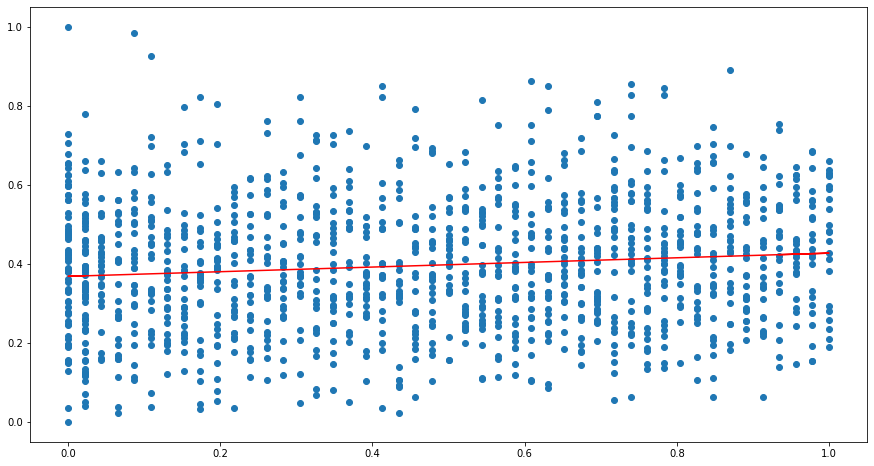

In [58]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

#MSE

In [59]:
metrics.mean_squared_error(Y, Y_pred)

0.02657509351149089

#Equaton

In [64]:
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)


intercept: 0.3685120208558402
slope: [0.05869476]


#KMeans

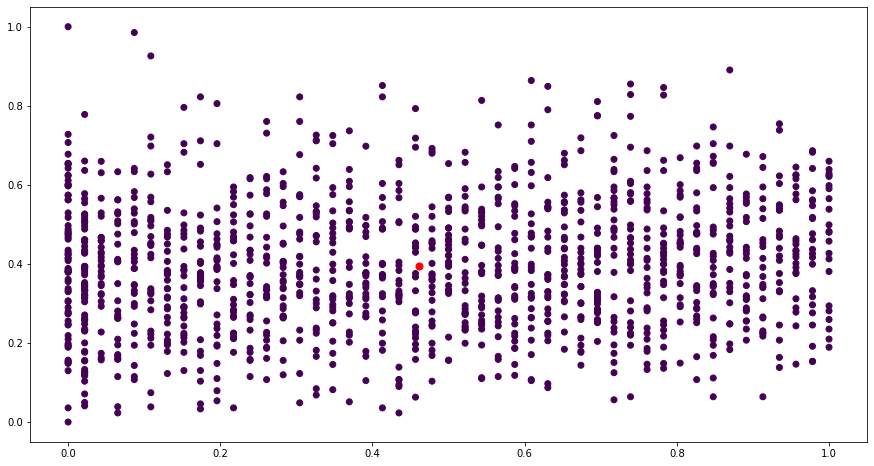

In [60]:

k = 1
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_norm)
plt.scatter(df_norm['age'], df_norm['bmi'], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()

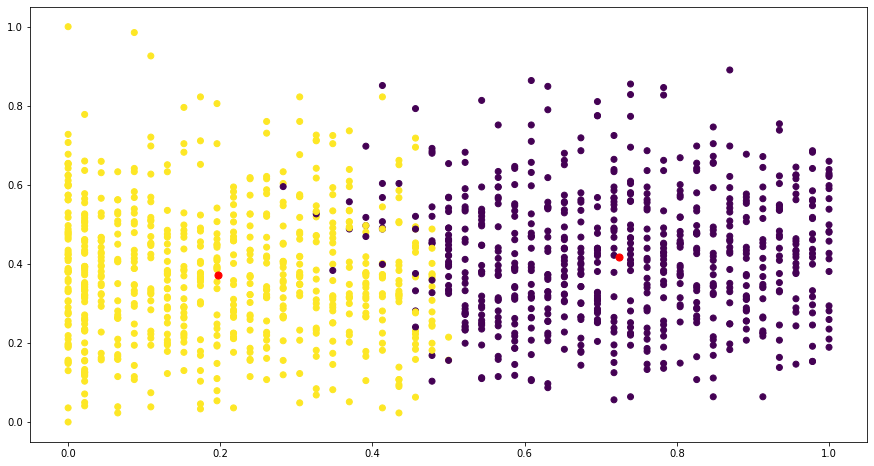

In [61]:

k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_norm)
plt.scatter(df_norm['age'], df_norm['bmi'], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()

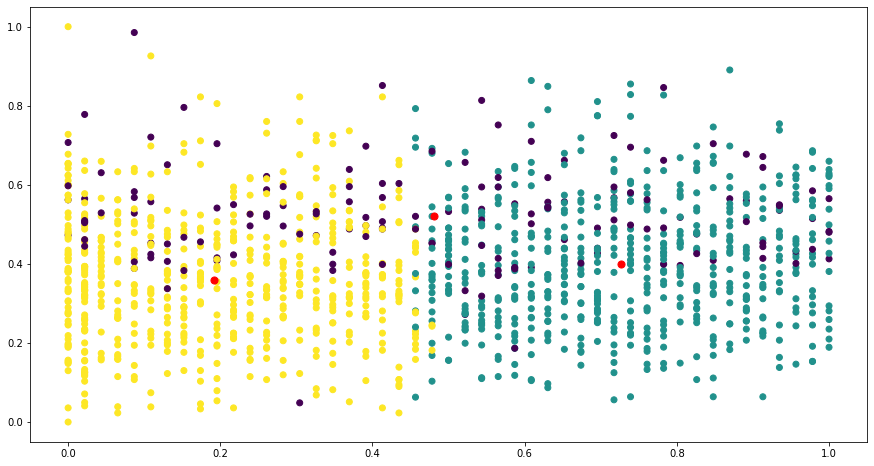

In [62]:

k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_norm)
plt.scatter(df_norm['age'], df_norm['bmi'], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()

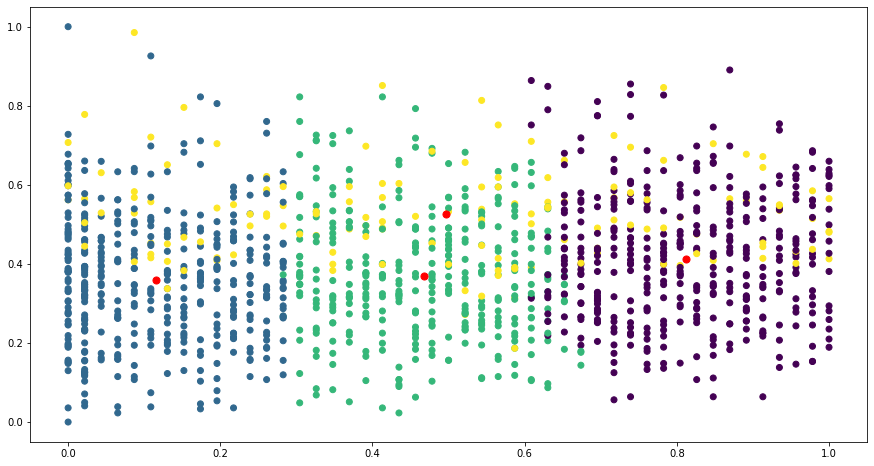

In [63]:

k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_norm)
plt.scatter(df_norm['age'], df_norm['bmi'], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()